# Talent Pitch Challenge

## Context

One table ( users.csv ) contains processed user information, while the other ( users_raw.csv ) contains raw user information.
Both tables can be joined using the user_id and id respectively.The main objective of the challenge is to perform an Exploratory Data Analysis (EDA) on the data.


## Exploratory data analysis (EDA)

## Data Inspection



In [176]:
# Libraries 

import pandas as pd
import numpy as np

# for graphs

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

In [177]:
# Data loading in python

users_df = pd.read_csv("users.csv")
users_raw_df = pd.read_csv("users_raw.csv")


In [178]:
# Colums in users_df

users_df.columns


Index(['user_id', 'desired_state', 'last_role', 'dreamt_companies',
       'forms_to_work', 'benefits_sought', 'my_languages', 'last_study',
       'level_last_study', 'interested_areas', 'knowledges', 'skills',
       'softwares_or_programs', 'methodologies', 'roles', 'received_messages',
       'sent_messages', 'num_resumes_created', 'events_scheduled',
       'views_to_resume_received', 'views_to_profile_received',
       'saved_from_playlist', 'reactions_received', 'average_feedback',
       'selector_appearances', 'reactiones_made', 'match_with_playlists',
       'contents_viewed', 'connections_sent'],
      dtype='object')

In [179]:
# colums in users_raw_df

users_raw_df.columns


Index(['id', 'created_at', 'birthdate', 'gender', 'city', 'state',
       'profile_completed'],
      dtype='object')

In [180]:
# change column name in users_raw_df from 'id' to 'user_id'

users_raw_df = users_raw_df.rename(columns={'id': 'user_id'})

# merge the users_df and users_raw_df dataframes

merged_df = pd.merge(users_df, users_raw_df, on = 'user_id')
merged_df.head()

,user_id,desired_state,last_role,dreamt_companies,forms_to_work,benefits_sought,my_languages,last_study,level_last_study,interested_areas,...,reactiones_made,match_with_playlists,contents_viewed,connections_sent,created_at,birthdate,gender,city,state,profile_completed
0,1.0,freelancer,CTO,['https://www.apple.com/'],"['virtual', 'mixed', 'in_house']","['bonuses', 'flexible_schedules', 'personal_re...","[['ES', 'advanced'], ['EN', 'advanced', None]]",Ingeniería de Sistemas,other,"['Calidad de Software', 'Formación', 'Tecnolog...",...,NaN,NaN,NaN,2.0,2016-01-07 18:10:23,1978-11-13,M,Bogotá,Cundinamarca,96.0
1,9670.0,entrepreneur,Líder en gestión de procesos,"['https://www.rutanmedellin.org/es/', 'http://...","['in_house', 'mixed']","['bonuses', 'study_opportunities', 'scholarshi...",[],Tecnología en sistemas electromecánicos,other,"['Física', 'Diseño', 'Ecología', 'Tecnología',...",...,NaN,NaN,NaN,NaN,2017-08-08 10:04:57,1998-02-17,F,Medellín,Antioquia,66.0
2,23825.0,employment,Líder de proyectos Masivos,"['https://www.medtronic.com/co-es/index.html',...","['virtual', 'in_house', 'mixed']","['flexible_schedules', 'study_opportunities', ...",[],Bioingeniería,NaN,"['Starups', 'Marketing Digital Móvil', 'Progra...",...,NaN,NaN,NaN,NaN,2019-04-10 16:57:08,1985-06-27,M,Medellín,Antioquia,59.0
3,2245.0,employment,Lider de desarollo,"[None, None, None]",[],[],"[[None, None, None]]",Ingeniería de Sistemas,other,"['Desarrollo de software', 'asf;aslkf;aslkfa;s...",...,NaN,NaN,NaN,5.0,2016-07-25 10:37:25,1992-10-19,M,Medellín,Antioquia,48.0
4,24328.0,freelancer,Diseñadora Gráfica Freelancer,"['https://www.kalley.com.co/', 'https://www.ma...",['virtual'],"['study_opportunities', 'flexible_schedules', ...","[[None, None, None]]",Gestión Del Diseño Gráfico,other,"['Diseño gráfico', 'Mercadeo', 'marketing digi...",...,NaN,NaN,NaN,2.0,2019-06-27 12:35:22,2001-05-09,F,Medellín,Antioquia,98.0


## Data Cleaning

In [181]:
# missing values merged_df

merged_df.isna().sum()

user_id                          0
desired_state                    0
last_role                       21
dreamt_companies                 0
forms_to_work                    0
benefits_sought                  0
my_languages                     0
last_study                       0
level_last_study               117
interested_areas                 0
knowledges                       0
skills                           0
softwares_or_programs            0
methodologies                    0
roles                            0
received_messages            15940
sent_messages                16149
num_resumes_created          15812
events_scheduled             16153
views_to_resume_received     15921
views_to_profile_received    15446
saved_from_playlist          15894
reactions_received           16084
average_feedback             16112
selector_appearances         15207
reactiones_made              16122
match_with_playlists         16164
contents_viewed              16109
connections_sent    

<Axes: >

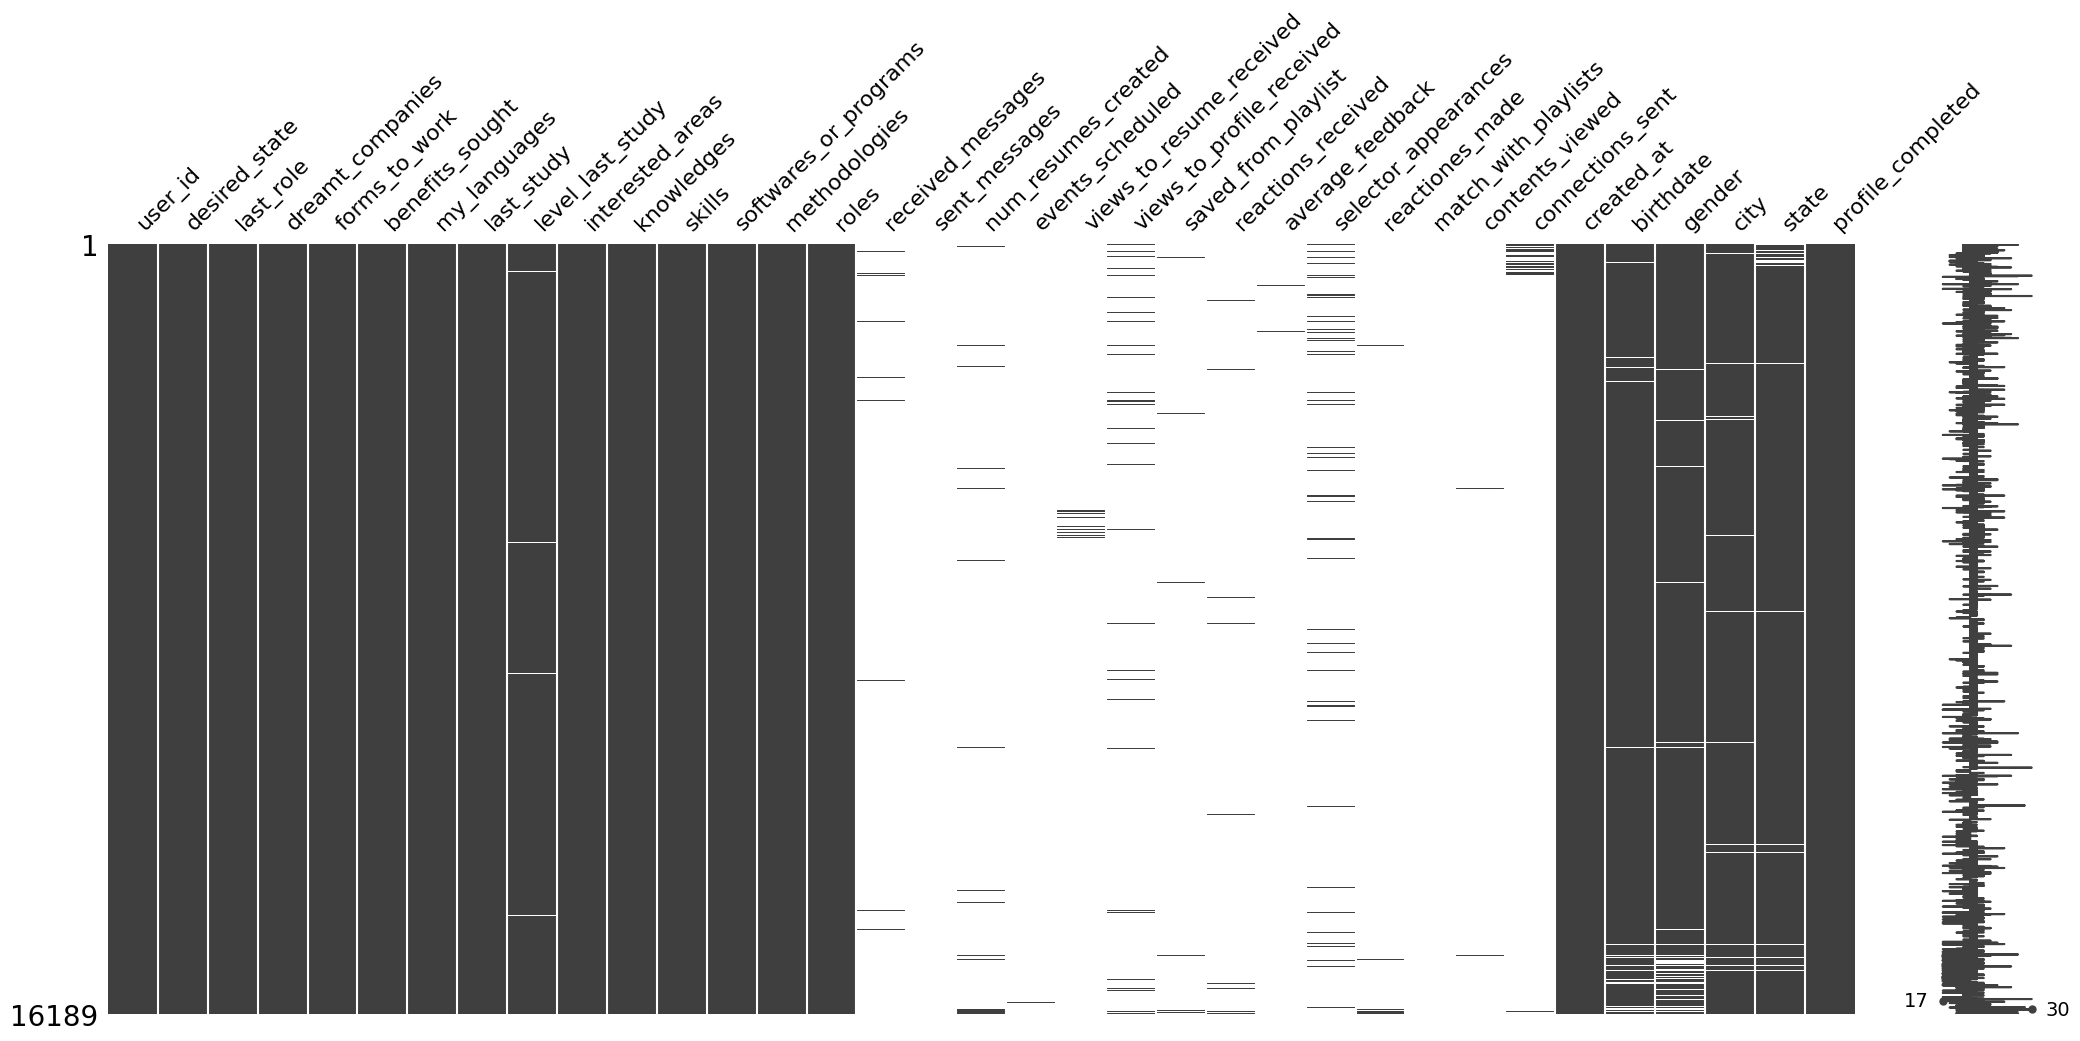

In [182]:
msno.matrix(merged_df)

* For the merged dataframe we can see that the columns: **user_id, desired_state, dreamt_companies, forms_to_work, benefits_sought, my_languages, last_study, interested_areas, knowledges, skills, softwares_or_programs, methodologies,roles** and **profile_completed** don't have any missing values. 
* The columns **received_messages, sent_messages, num_resumes_created, events_scheduled, views_to_resume_received   ,views_to_profile_received, saved_from_playlist, reactions_received, average_feedback, selector_appearances       ,reactiones_made, match_with_playlists, contents_viewed** and **connections_sent** have quite a large amount of missing values 
* The columns **last_role,level_last_study, created_at, birthdate, gender, city** and **state** also have missing values but not in such a large scale

**Important:** Since for some of the columns, the majority of the data consists of missing values, we would be left with no data if we drop all the rows that have missing values. We could drop the columns that have more than 80% of missing values using the following code:

In [183]:
# limitPer = len(merged_df) * .80
# merged_df_clean = merged_df.dropna(thresh=limitPer, axis=1)

But since this will cause that the columns that have information that we can consider as output variables will be dropped, it is also not a feasible option.

In [184]:
# Check if the columns with no missing values are empty or have invalid entries 

merged_df["dreamt_companies"].value_counts()

dreamt_companies
[]                                                                                                                                    6621
[None, None, None]                                                                                                                     192
['Google']                                                                                                                              63
[None]                                                                                                                                  58
['www.google.com']                                                                                                                      52
                                                                                                                                      ... 
['https://www.slb.com/', 'https://www.tesla.com/', 'https://www.toyota.com.co/']                                                         1
['http', '

In [185]:
merged_df["forms_to_work"].value_counts()

forms_to_work
[]                                                                4998
['mixed']                                                         1384
['in_house', 'virtual', 'mixed']                                  1253
['virtual']                                                       1240
['virtual', 'mixed']                                               938
                                                                  ... 
['in_house', 'flexible', 'teleworking']                              1
['teleworking', 'flexible', 'in_house']                              1
['teleworking', 'virtual', 'per_hours']                              1
['in_house', 'freelancer', 'virtual', 'per_hours', 'flexible']       1
['virtual', 'flexible', 'per_hours']                                 1
Name: count, Length: 105, dtype: int64

In [186]:
merged_df["city"].value_counts()

city
Bogotá           5285
Medellin         1362
Cali              926
Barranquilla      644
Bucaramanga       348
                 ... 
Balachaur           1
Adampur             1
Gamarra             1
Puerto Rondon       1
Caracoli            1
Name: count, Length: 601, dtype: int64

Since some of the columns that are supossed to not have missing values have fields that are empty we need to replace them so they will me recognized as empty values

In [187]:
merged_df = merged_df.replace("[]", np.nan)

In [188]:
merged_df = merged_df.replace("[None]", np.nan)

In [189]:
merged_df = merged_df.replace("[None, None]", np.nan)

In [190]:
merged_df = merged_df.replace("[None, None, None]", np.nan)

In [191]:
merged_df.isna().sum()

user_id                          0
desired_state                    0
last_role                       21
dreamt_companies              6876
forms_to_work                 4998
benefits_sought               5422
my_languages                  1094
last_study                       0
level_last_study               117
interested_areas              3067
knowledges                    4932
skills                        4976
softwares_or_programs         5177
methodologies                 6302
roles                        13628
received_messages            15940
sent_messages                16149
num_resumes_created          15812
events_scheduled             16153
views_to_resume_received     15921
views_to_profile_received    15446
saved_from_playlist          15894
reactions_received           16084
average_feedback             16112
selector_appearances         15207
reactiones_made              16122
match_with_playlists         16164
contents_viewed              16109
connections_sent    

* Since dropping all rows with missing values is not viable, we will drop the rows where at least 40% of the columns have a missing value. 

In [192]:
# keep rows where at least 60% of the variables are filled

limitPer = merged_df.shape[1] * .60

merged_df_clean = merged_df.dropna(thresh=limitPer)

In [193]:
merged_df_clean.isna().sum()

user_id                         0
desired_state                   0
last_role                       3
dreamt_companies               87
forms_to_work                  37
benefits_sought                 9
my_languages                   17
last_study                      0
level_last_study                2
interested_areas                2
knowledges                      3
skills                          4
softwares_or_programs           2
methodologies                  20
roles                        1080
received_messages            2547
sent_messages                2730
num_resumes_created          2496
events_scheduled             2737
views_to_resume_received     2647
views_to_profile_received    2143
saved_from_playlist          2515
reactions_received           2698
average_feedback             2697
selector_appearances         2098
reactiones_made              2711
match_with_playlists         2744
contents_viewed              2704
connections_sent             2449
created_at    

In [194]:
len(merged_df_clean)

2769

## Insight Discovery

### Top 5 roles with the highest average_feedback by gender

In [195]:
Insight_1 = merged_df_clean.groupby(['roles','gender'], as_index=False)['average_feedback'].max().sort_values(by= "average_feedback", ascending = False).reset_index(drop= True).head(5)
Insight_1    

,roles,gender,average_feedback
0,['Consultor Empaques ecológicos'],M,5.0
1,['Desarrollador Front-end'],M,5.0
2,"['Desarrollador de software', 'Desarrollador J...",M,5.0
3,['Developer'],M,5.0
4,['Consultor BI - DDDM Process'],M,5.0


* We can see that The top 5 roles with the highest average_feedback for men are **Consultor Empaques ecológicos, Desarrollador Front-end , Desarrollador de software, Developer** and **Consultor BI - DDDM Process**.


### Average views_to_resume_received by city

In [196]:
nwv = merged_df_clean['city'].isin(['1970-09-09','1980-02-22','1985-05-12','1987-01-25', '1988-06-03','1989-04-14','1990-05-01','1991-08-23','1994-04-19','1997-02-03','1997-02-26','1997-08-21','1997-09-03','2000-01-01'])
merged_df_clean = merged_df_clean[~nwv]

Insight_2 = merged_df_clean[['city','views_to_resume_received']].groupby('city').mean().head(20)
Insight_2 


,views_to_resume_received
city,
Abejorral,NaN
Acacias,NaN
Achi,NaN
Aguachica,NaN
Aguadas,NaN
Agustin Codazzi,NaN
Algarrobo,NaN
Alpujarra,NaN
Amaga,NaN


* Due to the amount of missing values in the views_to_resume_received column, is not possible to draw a conclusion out of this information

In [197]:
Insight_3 = merged_df_clean.groupby(["desired_state","level_last_study"], as_index=False)['dreamt_companies'].value_counts().sort_values(by= "dreamt_companies", ascending = False).reset_index(drop= True).head(5)
Insight_3 

,desired_state,level_last_study,dreamt_companies,count
0,employment,undergraduate,"[None, 'https://boweryfarming.com/', 'https://...",1
1,freelancer,undergraduate,"['Éxito', 'Sura', 'Comfama']",1
2,employment,specialization,['Áreas de tecnología de de entidades financie...,1
3,employment,master_degree,"['www.xm.com.co', 'https://www.xm.com.co/']",1
4,freelancer,other,"['www.velneo.es', 'www.cisco.com', 'Microsoft']",1


* Some of the top companies are **Éxito, Sura, Comfama, Microsoft** and **cisco**

## Visualization

### Stacked bar plot of forms_to_work by level_last_study .

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]),
 [Text(0, 0, "['virtual', 'mixed', 'in_house']"),
  Text(1, 0, "['virtual']"),
  Text(2, 0, "['in_house', 'virtual']"),
  Text(3, 0, "['in_house', 'mixed', 'virtual']"),
  Text(4, 0, "['in_house', 'virtual', 'mixed']"),
  Text(5, 0, "['mixed', 'virtual', 'to_be_agreed']"),
  Text(6, 0, "['mixed', 'in_house', 'virtual']"),
  Text(7, 0, "['in_house', 'to_be_agreed']"),
  Text(8, 0, "['in_house', 'virtual', 'mixed', 'to_be_agreed']"),
  Text(9, 0, "['mixed', 'virtual']"),
  Text(10, 0, "['mixed']"),
  Text(11, 0, "['virtual', 'mixed']"),
  Text(12, 0, "['mixed', 'to_be_agreed']"),
  Text(13, 0, "['in_house', 'mixed']"),
  Text(14, 0, "['in_house', 'mixe

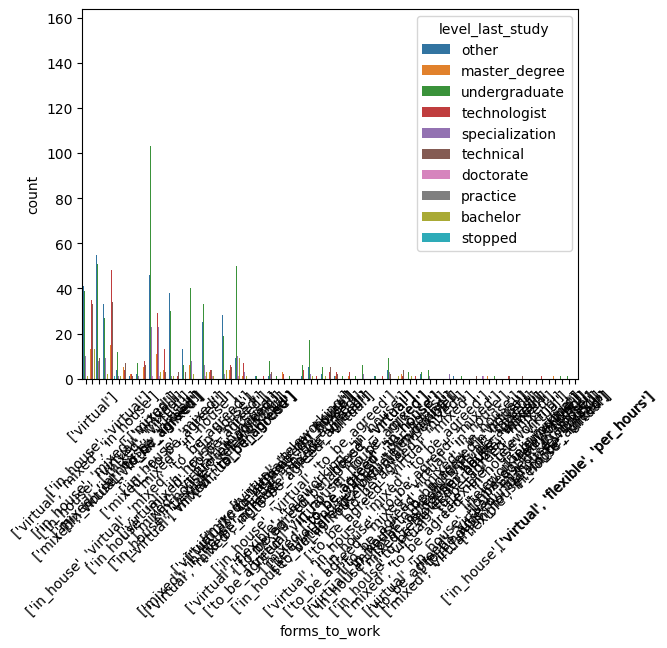

In [198]:
sns.countplot(x='forms_to_work',hue='level_last_study',data=merged_df_clean)
plt.xticks(rotation=45)




### Scatter plot of age vs. average_feedback

C:\Users\kelly\AppData\Local\Temp\ipykernel_22316\4085716309.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Age",y="average_feedback",data = merged_df_clean,palette='Paired')


<Axes: xlabel='Age', ylabel='average_feedback'>

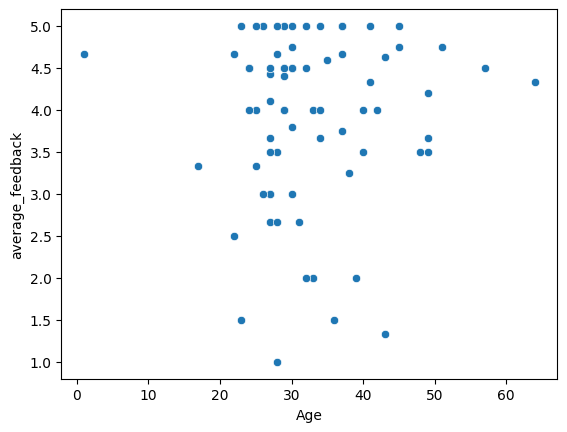

In [199]:
merged_df_clean['birthdate'] = pd.to_datetime(merged_df_clean['birthdate'])
merged_df_clean['year'], merged_df_clean['month'] = merged_df_clean['birthdate'].dt.year, merged_df_clean['birthdate'].dt.month
merged_df_clean['Age'] = 2023 - merged_df_clean['year']

sns.scatterplot(x="Age",y="average_feedback",data = merged_df_clean,palette='Paired')

### Line plot of profile_completed over time (by day, by week, etc.).

<Axes: xlabel='created_at_year', ylabel='profile_completed'>

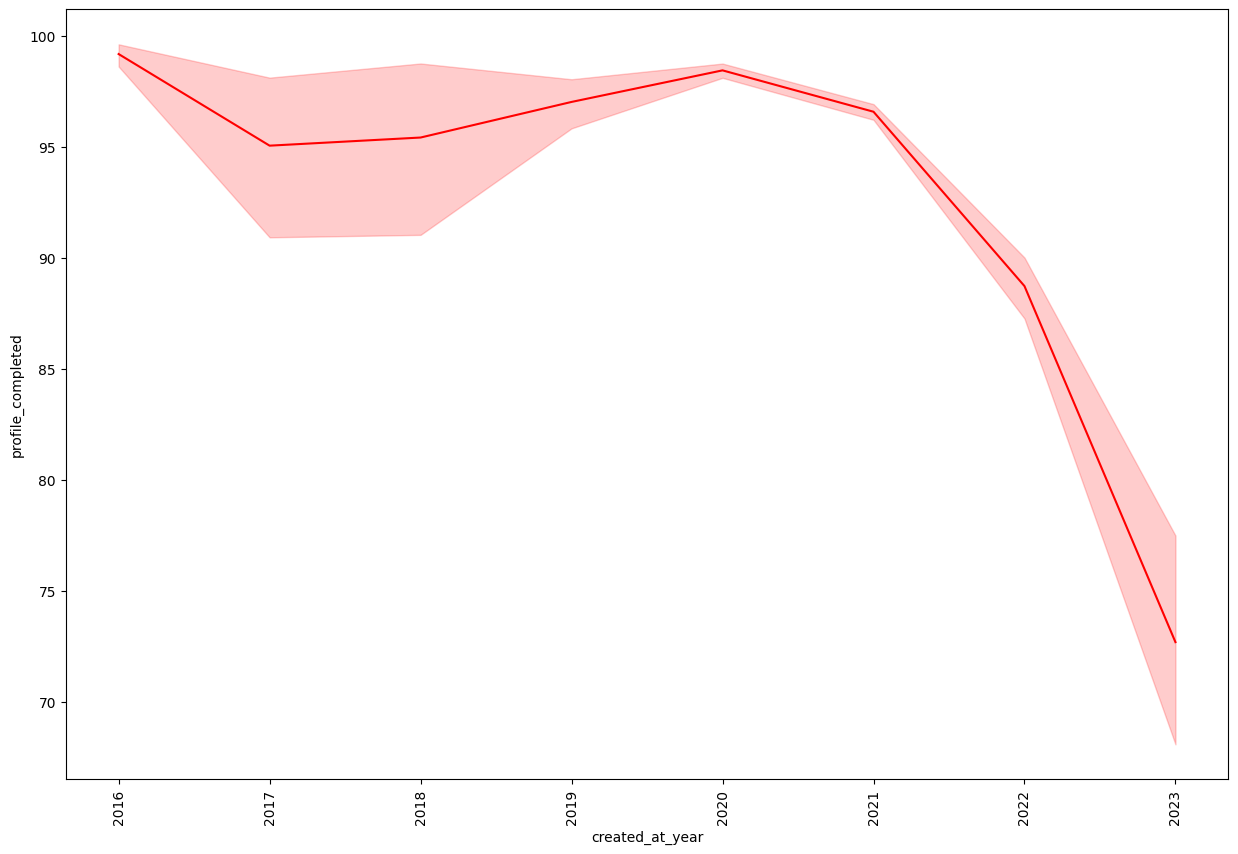

In [200]:
merged_df_clean['created_at'] = pd.to_datetime(merged_df_clean['created_at'])
merged_df_clean['created_at_year'], merged_df_clean['created_at_month'] = merged_df_clean['created_at'].dt.year, merged_df_clean['created_at'].dt.month

plt.figure(figsize = (15, 10)) 
plot = sns.lineplot(data = merged_df_clean, x = 'created_at_year', y = 'profile_completed',color = 'red')
plt.xticks(rotation = 90)
plot

### Scatter plot of views_to_resume_received vs. reactions_received ,colored by profile_completed

C:\Users\kelly\AppData\Local\Temp\ipykernel_22316\4274515397.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="views_to_resume_received", y="reactions_received", data = merged_df_clean, palette='profile_completed')


<Axes: >

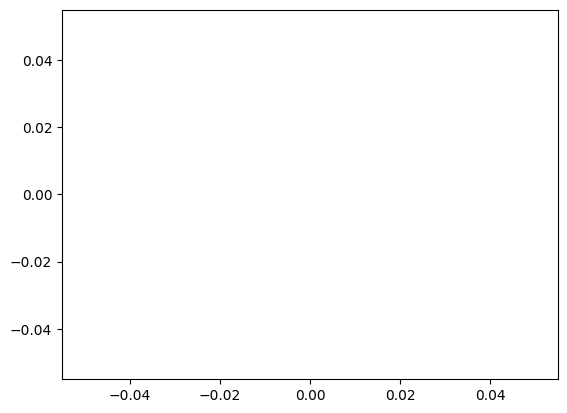

In [201]:
sns.scatterplot(x="views_to_resume_received", y="reactions_received", data = merged_df_clean, palette='profile_completed')